In [1]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [11]:
# Example 1: Vacation dataset
# Read in data
vacation = pd.read_csv(r'C:\Users\ungdu\Downloads\lab6_datamining_20521214\df_furniture.csv', index_col=0, parse_dates=True)
print(vacation.head())

            furniture_price_adjusted
Month                               
1992-01-01               2070.119382
1992-02-01               2111.106867
1992-03-01               2256.958503
1992-04-01               2251.499585
1992-05-01               2327.689022


In [12]:
# Estimate Moving Average Model
# Fit an MA(1) model to the first simulated data
mod = ARIMA(furn, order=(0, 0, 1))
res = mod.fit()

c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
# Print out summary information on the fit
print(res.summary())

                                  SARIMAX Results                                   
Dep. Variable:     furniture_price_adjusted   No. Observations:                  331
Model:                       ARIMA(0, 0, 1)   Log Likelihood               -2821.476
Date:                      Tue, 04 Jun 2024   AIC                           5648.951
Time:                              01:08:34   BIC                           5660.357
Sample:                          01-01-1992   HQIC                          5653.500
                               - 07-01-2019                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5966.5896    124.928     47.760      0.000    5721.734    6211.445
ma.L1          0.8848      0.033     26.432      0.000       0.819       0.950
sigm

In [14]:
# Print out the estimate for the coefficients
print(res.params)

const     5.966590e+03
ma.L1     8.848020e-01
sigma2    1.477284e+06
dtype: float64


In [15]:
# Forecast Moving Average Model
# Forecast the first MA(1) model
mod = ARIMA(furn, order=(0, 0, 1))
res = mod.fit()

c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
# Start the forecast 10 data points before the end of the point series at ,
# and end the forecast 10 data points after the end of the series at point
forecast = res.get_forecast(steps=120)
forecast_ci = forecast.conf_int()

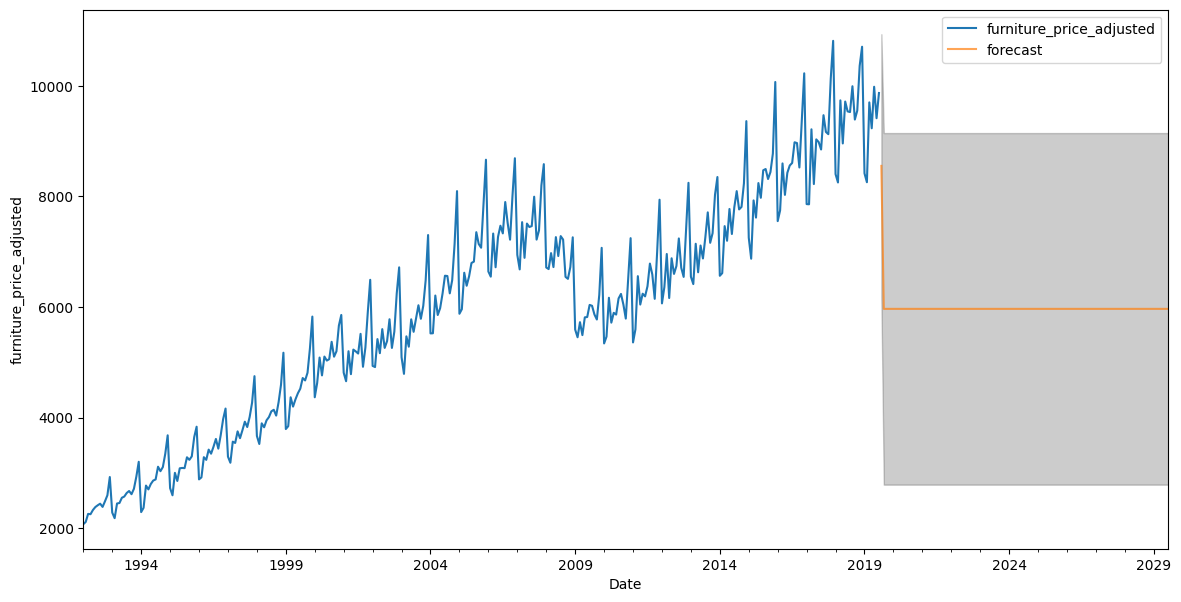

In [17]:
# Plot forecast
ax = furn.plot(label='observed')
forecast.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('furniture_price_adjusted')
plt.legend()
plt.show()